## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(r"/kaggle/input/playground-series-s4e8/train.csv")
test_data = pd.read_csv(r"/kaggle/input/playground-series-s4e8/test.csv")
sample_submission_data = pd.read_csv(r"/kaggle/input/playground-series-s4e8/sample_submission.csv")

print("train_data :", train_data.shape)
print("test_data :", test_data.shape)
print("sample_submission_data :", sample_submission_data.shape)

train_data : (3116945, 22)
test_data : (2077964, 21)
sample_submission_data : (2077964, 2)


In [3]:
train_data.sample(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1763944,1763944,p,7.41,s,NaN,g,t,d,NaN,g,...,NaN,t,n,NaN,NaN,f,f,NaN,d,u
789434,789434,e,7.03,p,s,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,u,a
2779381,2779381,p,5.20,f,k,n,f,p,NaN,n,...,NaN,k,n,NaN,NaN,t,f,NaN,d,u
1580270,1580270,p,6.92,s,h,n,t,d,NaN,g,...,NaN,t,n,NaN,NaN,f,f,NaN,d,u
214768,214768,p,3.35,f,d,b,f,x,c,y,...,b,s,n,NaN,NaN,f,f,NaN,l,a
2118269,2118269,p,2.71,x,d,w,f,a,d,p,...,NaN,h,w,NaN,NaN,f,f,NaN,g,u
471007,471007,e,1.10,x,g,n,t,a,NaN,w,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,a
1862541,1862541,p,5.31,b,i,k,f,e,NaN,g,...,NaN,NaN,k,NaN,NaN,f,f,NaN,m,a
2184118,2184118,e,4.90,x,s,n,f,p,NaN,n,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2164069,2164069,e,5.77,s,d,o,f,d,d,o,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a


In [4]:
test_data.sample(10)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1267507,4384452,1.52,x,NaN,n,f,NaN,NaN,n,5.04,...,NaN,s,n,NaN,NaN,f,f,k,g,a
1312096,4429041,7.65,p,g,n,f,e,NaN,w,8.20,...,NaN,y,w,u,w,t,p,NaN,d,u
630294,3747239,7.19,x,s,w,f,e,c,p,5.51,...,NaN,NaN,w,NaN,w,t,e,NaN,m,s
1372042,4488987,3.13,x,s,w,f,d,d,w,3.85,...,NaN,NaN,w,NaN,NaN,f,f,NaN,m,w
830911,3947856,3.25,f,y,n,f,a,d,p,8.07,...,NaN,i,n,NaN,NaN,f,f,NaN,h,a
1572934,4689879,10.17,x,t,n,t,p,NaN,y,8.87,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
1324253,4441198,6.20,x,NaN,n,f,d,c,w,5.59,...,b,NaN,n,NaN,NaN,f,f,NaN,l,a
1908397,5025342,1.49,x,k,n,f,NaN,NaN,n,3.76,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
190090,3307035,6.22,x,NaN,y,f,s,d,y,4.79,...,NaN,i,y,NaN,NaN,f,f,NaN,d,a
378271,3495216,5.89,x,NaN,y,f,s,d,y,6.08,...,NaN,i,y,NaN,NaN,f,f,NaN,d,a


## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

# There are some Incorrect Data Entries

In [6]:
cate_col = train_data.select_dtypes(include = ['object']).columns

In [7]:
unique_categories = {col: train_data[col].unique() for col in cate_col}
unique_categories

{'class': array(['e', 'p'], dtype=object),
 'cap-shape': array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
        'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
        '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
        '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
        '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
        'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
        '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
        '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
        '6.53', '19.06'], dtype=object),
 'cap-surface': array(['s', 'h', 'y', 'l', 't', 'e', 'g', nan, 'd', 'i', 'w', 'k',
        '15.94', 'f', 'n', 'r', 'o', 'a', 'u', 'z', '2.7', 'does l',
        '5.07', 'p', 'b', 'm', 'cap-diameter', '1.43', 'x', '7.14', 'c',
        'is h', 'does t', '0.85', '6.57', '12.79', '6.45', '4.66', '23.18',
        '3.06', '16.3

# Correcting The misleading data¶

In [8]:
replacements = {
    '5 f': 'f', '7 x': 'x', 'is s': 's', 'is p': 'p', 
    '3 x': 'x', 'b f': 'b', 'does n': 'n', 'does w': 'w',
    'is n': 'n', 'e n': 'e', 'is w': 'w', 'f has-ring': 'f',
    'does f': 'f', 'is h': 'h'
}

# Convert the replacements dictionary to a format that can be used for vectorized operations
replacement_dict = {k: v for k, v in replacements.items()}

# Function to clean and correct errors in a column using vectorized replace
def clean_column(column):
    return column.replace(replacement_dict, regex=True)

# Apply the cleaning function to all object columns in the DataFrame
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = clean_column(train_data[col])

for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = clean_column(test_data[col])

In [9]:
sample_submission_data

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [10]:
train_data = train_data.drop_duplicates()
train_data.shape

(3116945, 22)

In [11]:
def null_percentage(df):
    per = ((df.isnull().sum()/len(df))*100).round(2)
    return per
print('Null values in Train Data')
print(null_percentage(train_data))

print('Null values in Test Data')
print(null_percentage(test_data))

Null values in Train Data
id                       0.00
class                    0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.53
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.81
gill-spacing            40.37
gill-color               0.00
stem-height              0.00
stem-width               0.00
stem-root               88.45
stem-surface            63.55
stem-color               0.00
veil-type               94.88
veil-color              87.94
has-ring                 0.00
ring-type                4.13
spore-print-color       91.43
habitat                  0.00
season                   0.00
dtype: float64
Null values in Test Data
id                       0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.51
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.83
gill-spacing            40.40
gill-color               0.00
stem

In [12]:
# train_data = train_data.drop(['veil-type'], axis=1)
# test_data = test_data.drop(['veil-type'], axis=1)

# Missing Values

In [13]:
num_cols = train_data.select_dtypes(include = ['float64']).columns
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())

In [14]:
train_data.sample(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2676997,2676997,p,5.91,b,s,n,f,NaN,NaN,k,...,NaN,s,w,NaN,NaN,t,z,NaN,d,w
2085950,2085950,p,6.46,s,h,r,t,d,NaN,w,...,NaN,t,r,NaN,NaN,f,f,NaN,d,u
286532,286532,p,9.13,s,NaN,r,t,d,NaN,o,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,u
3110329,3110329,p,3.24,f,k,w,f,s,NaN,p,...,NaN,NaN,n,NaN,NaN,f,f,p,g,u
1740874,1740874,e,10.93,s,NaN,n,f,NaN,NaN,w,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a


class
p    1705396
e    1411549
Name: count, dtype: int64


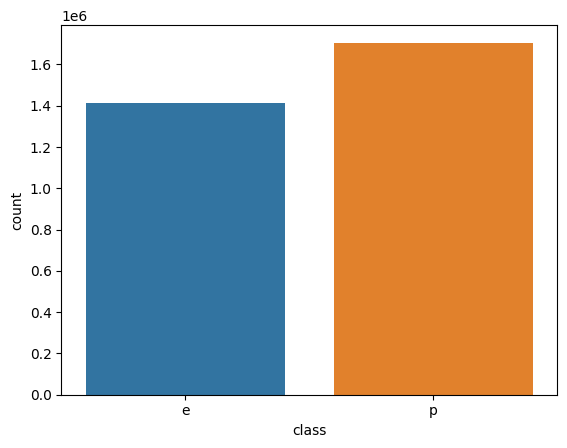

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
print(train_data['class'].value_counts())
sns.countplot(x='class',data=train_data)
plt.xticks()
plt.show();

### Filling NAN Values

In [16]:
cat_cols = list(train_data.select_dtypes(include = ['object']).columns.difference(['class']))

for col in cat_cols:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value,inplace = True)
    
for col in cat_cols:
    mode_value = test_data[col].mode()[0]
    test_data[col].fillna(mode_value, inplace=True)

/tmp/ipykernel_18/3305656056.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(mode_value,inplace = True)
/tmp/ipykernel_18/3305656056.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

### Encode Categorical Columns


<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[cat_cols] = encoder.fit_transform(train_data[cat_cols])
test_data[cat_cols] = encoder.transform(test_data[cat_cols])

In [18]:
labelencoder = LabelEncoder()
train_data['class'] = labelencoder.fit_transform(train_data['class'])

In [19]:
df_dropped = train_data.dropna()

# Encode categorical variables
df_encoded = df_dropped.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

In [20]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,0,8.80,49.0,71.0,71.0,8.0,44.0,28.0,57.0,...,15.0,51.0,52.0,19.0,21.0,5.0,17.0,17.0,25.0,0.0
1,1,1,4.51,65.0,56.0,63.0,8.0,44.0,28.0,44.0,...,15.0,58.0,44.0,19.0,21.0,17.0,38.0,17.0,25.0,3.0
2,2,0,6.94,49.0,71.0,49.0,8.0,74.0,28.0,57.0,...,15.0,51.0,43.0,19.0,21.0,5.0,17.0,17.0,34.0,3.0
3,3,0,3.88,49.0,80.0,56.0,8.0,69.0,28.0,35.0,...,15.0,51.0,52.0,19.0,21.0,5.0,17.0,17.0,25.0,2.0
4,4,0,5.85,65.0,64.0,73.0,8.0,47.0,28.0,57.0,...,15.0,51.0,52.0,19.0,21.0,5.0,17.0,17.0,29.0,0.0


In [21]:
X = train_data.drop(['id','class'], axis=1)
y = train_data['class']
test = test_data.drop(['id'], axis=1)
X.shape,y.shape

((3116945, 20), (3116945,))

In [22]:
parameters ={'n_estimators': 432, 'max_depth': 18, 'learning_rate': 0.019177494166556952, 'subsample': 0.6944494028059239, 'colsample_bytree': 0.5177980824894136, 'gamma': 0.0004342336537981622, 'lambda': 1.3527652792856453e-06, 'alpha': 4.10797226500692e-08, 'scale_pos_weight': 1.0121323580230017}

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(**parameters)
model = model.fit(X, y)

In [24]:
preds = model.predict(test)
predictions = labelencoder.inverse_transform(preds)
submission = pd.DataFrame({'id': test_data.id, 'class': predictions})
submission.to_csv('submission_by_xgb.csv', index=False)